Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************

2024-05-12 16:50:33.272 | INFO     | alchemlyb.workflows.base:__init__:50 - Alchemlyb Version: f2.1.0
2024-05-12 16:50:33.272 | INFO     | alchemlyb.workflows.base:__init__:51 - Set Temperatu

<Axes: xlabel='Fraction of the simulation time', ylabel='$\\Delta G$ (kJ/mol)'>

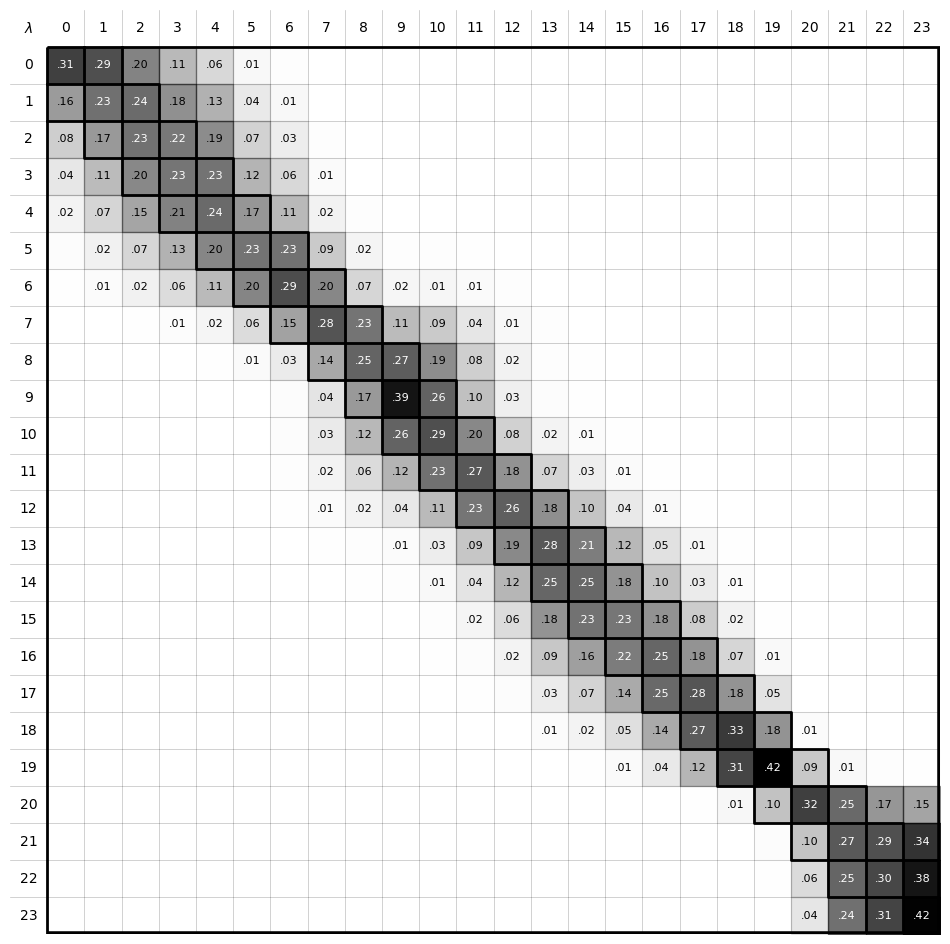

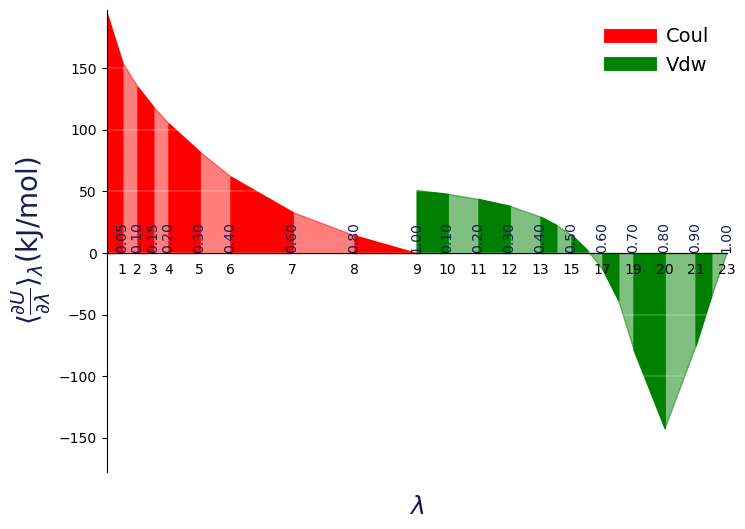

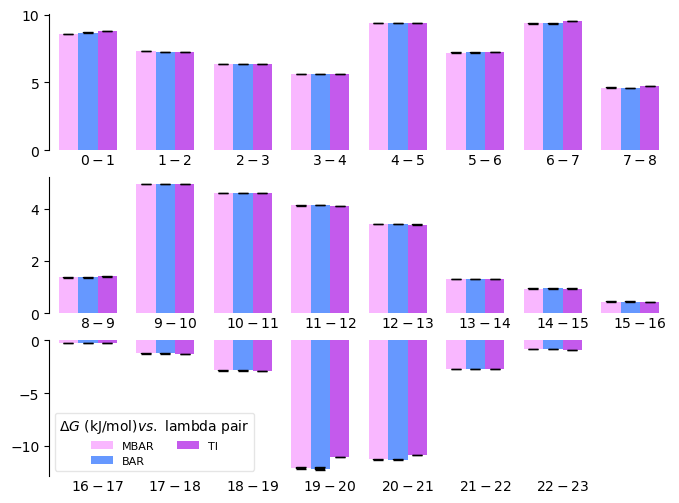

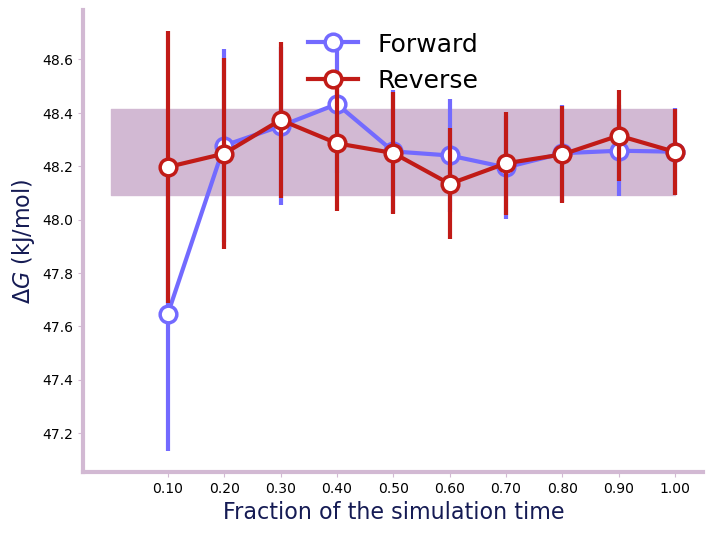

In [1]:
from alchemlyb.workflows import ABFE
import os
sys = '1' # Pure water
dir = '/Users/estebancea/Library/CloudStorage/OneDrive-Personal/Doctorado/00_Trabajo/20_SAC/12_free_energy/MD/' + sys + '/xvg_files'
# Load the data
workflow = ABFE(software='GROMACS', dir=dir,
                 prefix='prd', suffix='xvg', T=303.15, outdirectory='./')
# Set the unit.
workflow.update_units('kJ/mol')
# Read the data
workflow.read()
# Decorrelate the data.
workflow.preprocess(skiptime=10000, uncorr='dhdl', threshold=50)
# Run the estimator
workflow.estimate(estimators=("MBAR", "BAR", "TI"))
# Retrieve the result
summary = workflow.generate_result()
# Plot the overlap matrix
workflow.plot_overlap_matrix(overlap='O_MBAR_' + sys + '.pdf')
# Plot the dHdl for TI
workflow.plot_ti_dhdl(dhdl_TI='dhdl_TI_' + sys + '.pdf')
# Plot the dF states
workflow.plot_dF_state(dF_state='dF_state_' + sys + '.pdf')
# Convergence analysis
workflow.check_convergence(10, dF_t='dF_t_' + sys + '.pdf')

In [ ]:
                      MBAR  MBAR_Error        BAR  BAR_Error         TI  TI_Error
States 0 -- 1     8.583132    0.017220   8.659141   0.019858   8.766747  0.010489
       1 -- 2     7.306195    0.010177   7.239576   0.012767   7.252513  0.007076
       2 -- 3     6.370425    0.007430   6.338531   0.010070   6.349625  0.005318
       3 -- 4     5.622446    0.006587   5.603410   0.008863   5.607804  0.004467
       4 -- 5     9.353219    0.012453   9.363273   0.016742   9.379682  0.008636
       5 -- 6     7.199085    0.012485   7.213520   0.015287   7.223213  0.008459
       6 -- 7     9.354692    0.021343   9.343931   0.024830   9.530918  0.014604
       7 -- 8     4.611654    0.013287   4.593476   0.016291   4.747504  0.011512
       8 -- 9     1.369036    0.008178   1.372153   0.011026   1.414684  0.009735
       9 -- 10    4.952421    0.006366   4.948587   0.008313   4.951375  0.008407
       10 -- 11   4.612152    0.007456   4.613260   0.009348   4.596741  0.009260
       11 -- 12   4.134256    0.009225   4.141827   0.011374   4.111922  0.010982
       12 -- 13   3.421623    0.010694   3.421733   0.013692   3.389944  0.013156
       13 -- 14   1.318034    0.006216   1.307009   0.008069   1.308735  0.007740
       14 -- 15   0.944263    0.007352   0.945530   0.009807   0.941273  0.009000
       15 -- 16   0.443752    0.009417   0.446254   0.012227   0.431107  0.010142
       16 -- 17  -0.242870    0.012841  -0.244028   0.015674  -0.269658  0.011174
       17 -- 18  -1.240764    0.019037  -1.234644   0.021909  -1.285426  0.011129
       18 -- 19  -2.846363    0.032627  -2.835541   0.034269  -2.919241  0.011978
       19 -- 20 -12.144552    0.104846 -12.167279   0.108739 -11.044468  0.022610
       20 -- 21 -11.280308    0.031273 -11.319331   0.037300 -10.868003  0.013774
       21 -- 22  -2.732760    0.005762  -2.732610   0.007517  -2.757265  0.003240
       22 -- 23  -0.855469    0.004042  -0.851704   0.004868  -0.876713  0.002233
Stages coul      59.769884    0.061578  59.727010   0.062796  60.272689  0.037750
       vdw      -11.516584    0.149911 -11.560937   0.032195 -10.289679  0.058724
       TOTAL     48.253300    0.161925  48.166073   0.135035  49.983010  0.069811